<a href="https://colab.research.google.com/github/Renator12/DATA-SCIENCE-PROJECTS-TMU/blob/main/Regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2024-02-13 23:28:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto-mpg.data’

auto-mpg.data           [ <=>                ]  29.58K  --.-KB/s    in 0.06s   

2024-02-13 23:28:18 (472 KB/s) - ‘auto-mpg.data’ saved [30286]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('auto-mpg.data',names = ["mpg","cyl","disp","hp","wt","acc","year","org","name"],delim_whitespace=True) #reading dataframe
df.drop(index=df[df['hp'] == '?'].index,inplace=True)                                   #dropping useless column with string ?


In [ ]:
clean_cars_df=df.dropna()      #dropping empty rows

<Axes: xlabel='wt'>

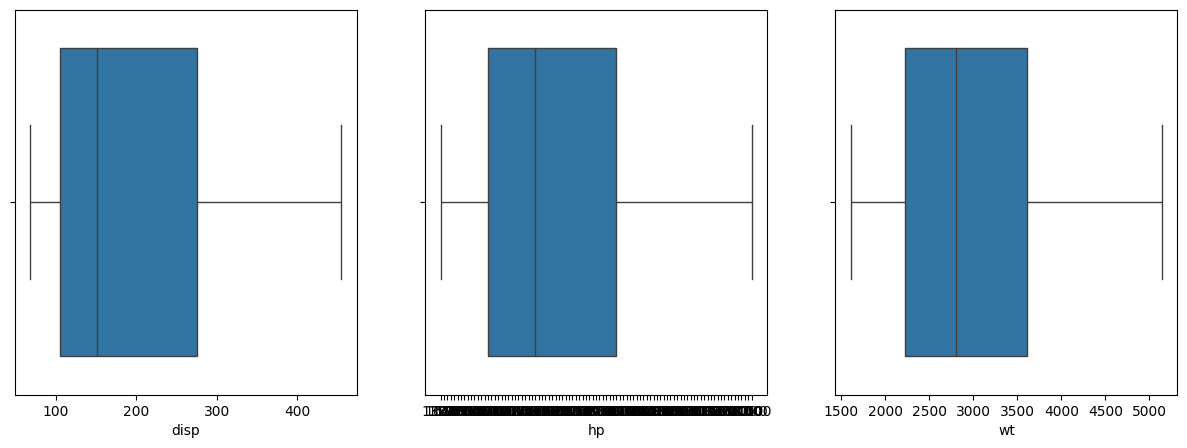

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)             #boxplots for disp,hp,wt

sns.boxplot(x=df['disp'])
plt.subplot(1,3,2)
sns.boxplot(x=df['hp'])
plt.subplot(1,3,3)
sns.boxplot(x=df['wt'])

In [ ]:
y=clean_cars_df['mpg'] #setting mpg as dependent variable and getting all the y values as mpg

In [ ]:
x1 = clean_cars_df[['disp', 'hp', 'wt']] #getting table of disp,hp,wt
x1.head()

,disp,hp,wt
0,307.0,130.0,3504.0
1,350.0,165.0,3693.0
2,318.0,150.0,3436.0
3,304.0,150.0,3433.0
4,302.0,140.0,3449.0


In [ ]:
reg1 = LinearRegression().fit(x1, y) #linearregression to fit multiple variables(disp,ht,wt) to mpg


In [ ]:
#coefficents,intercepts and r^2 values for multi linear regression
print("Coefficients:", reg1.coef_)
print("Intercept:", reg1.intercept_)
print("R-squared:", reg1.score(x1, y))


Coefficients: [-0.00576882 -0.04167414 -0.00535159]
Intercept: 44.855935695265046
R-squared: 0.7069554693444708


The regression analysis for the predictors displacement (disp), horsepower (hp), and weight (wt) versus miles per gallon (mpg) yields coefficients of approximately -0.0058, -0.0417, and -0.0054, respectively. This suggests that for every one-unit increase in displacement, horsepower, and weight, there are approximate decreases of 0.0058, 0.0417, and 0.0054 units in miles per gallon, respectively. The intercept value of 44.86 indicates the estimated miles per gallon when all predictors are zero. With an R-squared value of 0.707, approximately 70.7% of the variability in miles per gallon can be explained by the linear relationship with displacement, horsepower, and weight combined. These findings underscore the significant impact of displacement, horsepower, and weight on fuel efficiency when considered together.

In [ ]:
#setting up individual columns into independent variables for regression
xdisp=clean_cars_df['disp'].values.reshape(-1,1) #disp
xhp=clean_cars_df['hp'].values.reshape(-1,1)#hp
xwt=clean_cars_df['wt'].values.reshape(-1,1)#wt

In [ ]:
regdisp=LinearRegression().fit(xdisp, y) #regressions for disp vs mpg
reght=LinearRegression().fit(xhp, y)      #hp vs mpg
regwt=LinearRegression().fit(xwt, y)     #wt vs mpg



In [ ]:
ansdisp=regdisp.predict(np.array(xdisp))  #predictions for all y values to compare regression to mpg values
anshp=reght.predict(np.array(xhp))
answt=regwt.predict(np.array(xwt))

Text(0, 0.5, 'mpg and linear regression for mpg')

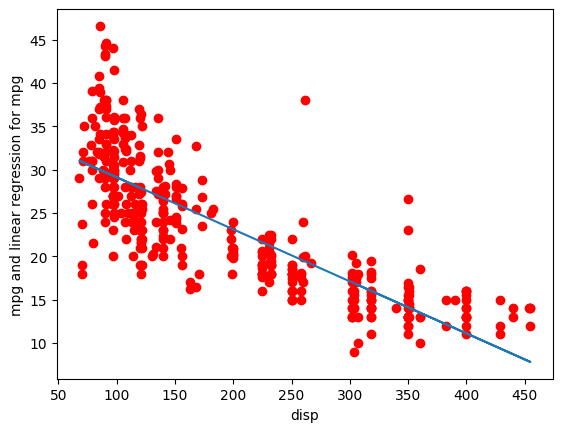

In [ ]:
#REGRESSION FOR DISP plotted
plt.scatter(clean_cars_df['disp'],clean_cars_df['mpg'],c='red')
plt.plot(clean_cars_df['disp'],ansdisp)
plt.xlabel('disp')
plt.ylabel('mpg and linear regression for mpg')

# **REGRESSIONS FOR DISP**

In [ ]:
print("Coefficients:", regdisp.coef_)
print("Intercept:", regdisp.intercept_)
print("R-squared:", regdisp.score(xdisp, y))



Coefficients: [-0.06005143]
Intercept: 35.12063593840391
R-squared: 0.6482294003193044


The regression analysis reveals a negative coefficient of
−0.060 for displacement, indicating that for every one-unit increase in displacement, there is an approximate decrease of 0.060 units in miles per gallon. The intercept of 35.12 suggests the estimated miles per gallon when displacement is zero. With an R-squared value of 0.648, approximately 64.8% of the variability in miles per gallon can be explained by the linear relationship with displacement. Overall, these findings suggest a statistically significant negative relationship between displacement and miles per gallon, highlighting the importance of considering displacement when predicting fuel efficiency.

Text(0, 0.5, 'hp and linear regression for hp')

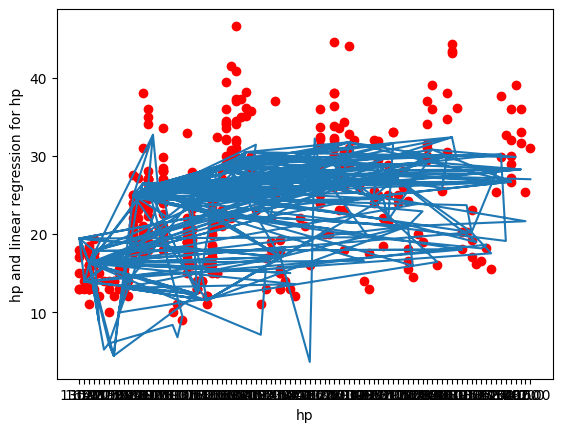

In [ ]:
plt.scatter(clean_cars_df['hp'],clean_cars_df['mpg'],c='red')
plt.plot(clean_cars_df['hp'],anshp)
plt.xlabel('hp')
plt.ylabel('hp and linear regression for hp')

# **REGRESSIONS FOR HP**

In [ ]:
print("Coefficients:", reght.coef_)
print("Intercept:", reght.intercept_)
print("R-squared:", reght.score(xhp, y))



Coefficients: [-0.15784473]
Intercept: 39.93586102117047
R-squared: 0.6059482578894348


The regression analysis shows a negative coefficient of -0.1578 for horsepower (hp), indicating a decrease of approximately 0.1578 units in miles per gallon for every one-unit increase in horsepower. The intercept of 39.936 suggests the estimated miles per gallon when horsepower is zero. With an R-squared value of 0.6059, around 60.6% of the variability in miles per gallon is explained by the linear relationship with horsepower, highlighting its significant impact on fuel efficiency.

# **REGRESSIONS FOR WT**

Text(0, 0.5, 'wt and linear regression for wt')

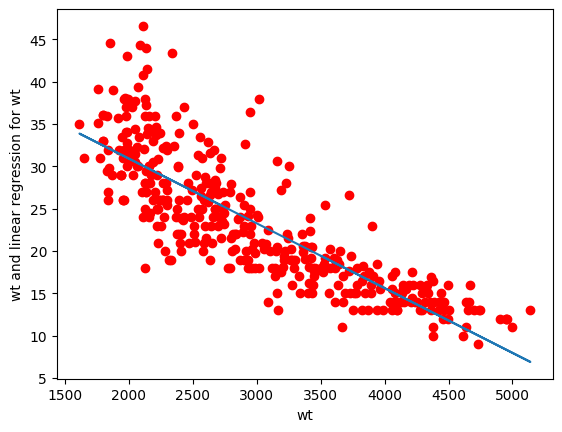

In [ ]:
plt.scatter(clean_cars_df['wt'],clean_cars_df['mpg'],c='red')
plt.plot(clean_cars_df['wt'],answt)
plt.xlabel('wt')
plt.ylabel('wt and linear regression for wt')

In [ ]:
print("Coefficients:", regwt.coef_)
print("Intercept:", regwt.intercept_)
print("R-squared:", regwt.score(xwt, y))



Coefficients: [-0.00764734]
Intercept: 46.21652454901758
R-squared: 0.6926304331206254


The regression analysis for weight (wt) versus miles per gallon (mpg) reveals a coefficient of -0.0076, indicating that for every one-unit increase in weight, there is an approximate decrease of 0.0076 units in miles per gallon. The intercept of 46.22 suggests the estimated miles per gallon when weight is zero. With an R-squared value of 0.6926, approximately 69.3% of the variability in miles per gallon can be explained by the linear relationship with weight. These findings underscore the significant impact of weight on fuel efficiency

In [ ]:
#calculating the intercept manually
x_mean = df['wt'].mean()
y_mean = df['mpg'].mean()
b1 = regwt.coef_[0]
intercept = y_mean - b1 * x_mean
intercept

46.21652454901758

In [ ]:
#calculating coefficent weight from scratch
numerator = np.sum((df['wt'] - x_mean) * (df['mpg'] - y_mean))
denominator = np.sum((df['wt'] - x_mean) ** 2)
coef = numerator / denominator
coef

-0.007647342535779581